In [1]:
import librosa
from strechableNumpyArray import StrechableNumpyArray
import numpy as np
import os

pathToDatasetFolder = 'commands/'
numbers = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
dirs = [pathToDatasetFolder+number for number in numbers]
audios = StrechableNumpyArray()
i = 0
total = 0
print('start')
for directory in dirs:
    print(directory)
    for file_name in os.listdir(directory):
        if file_name.endswith('.wav'):      
            audio, sr = librosa.load(directory + '/' + file_name, sr=None, dtype=np.float64)

            if len(audio) < 16000:
                before = int(np.floor((16000-len(audio))/2))
                after = int(np.ceil((16000-len(audio))/2))
                audio = np.pad(audio, (before, after), 'constant', constant_values=(0, 0))
#             if len(audio) < 16000:
#                 print(file_name, "is too short: ", len(audio))
#                 continue
            if len(audio) > 16000: 
                print(file_name, "is too long: ", len(audio))
            if np.sum(np.absolute(audio)) < len(audio)*1e-4: 
                print(file_name, "doesn't meet the minimum amplitude requirement")
                continue

            audios.append(audio[:16000])
            i+=1

            if i > 10:
                break
                i -= 1000
                total += 1000
                print("1000 plus!", total)
print("there were: ", total+i)

audios = audios.finalize()
audios = np.reshape(audios, (total+i, len(audio))).astype(np.float64)



start
commands/zero
commands/one
commands/two
commands/three
commands/four
commands/five
commands/six
commands/seven
commands/eight
commands/nine
there were:  20


In [2]:
from ourLTFATStft import LTFATStft
import ltfatpy
from modGabPhaseGrad import modgabphasegrad
ltfatpy.gabphasegrad = modgabphasegrad # This function is not implemented for one sided stfts with the phase method on ltfatpy

fft_hop_size = 128
fft_window_length = 512
L = 16384

anStftWrapper = LTFATStft()
# spectrograms = np.zeros([len(audios), int(fft_window_length//2+1), int(L/fft_hop_size)], dtype=np.float64)
# tgrads = np.zeros([len(audios), int(fft_window_length//2+1), int(L/fft_hop_size)], dtype=np.float64)
# fgrads = np.zeros([len(audios), int(fft_window_length//2+1), int(L/fft_hop_size)], dtype=np.float64)
# print(spectrograms.shape)
# gs = {'name': 'gauss', 'M': 512}
    
# for index, audio in enumerate(audios):
#     realDGT = anStftWrapper.oneSidedStft(signal=audio, windowLength=fft_window_length, hopSize=fft_hop_size)
#     spectrogram = anStftWrapper.logMagFromRealDGT(realDGT, clipBelow=np.e**-10, normalize=True)
#     spectrograms[index] = spectrogram  
#     tgradreal, fgradreal = ltfatpy.gabphasegrad('phase', np.angle(realDGT), fft_hop_size,
#                                                 fft_window_length)
#     tgrads[index] = tgradreal /64
#     fgrads[index] = fgradreal /256


-6.487605142192445
1.81063863133757
0.0
-14.0


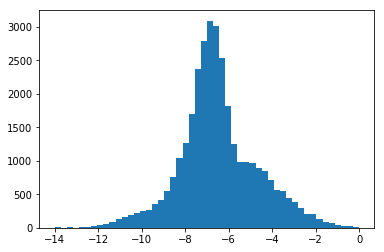

In [3]:
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42

realDGT = anStftWrapper.oneSidedStft(signal=audios[1], windowLength=512, hopSize=128)
spectrogram = anStftWrapper.logMagFromRealDGT(realDGT, clipBelow=np.e**-14, normalize=True)

print(np.mean(spectrogram))
print(np.std(spectrogram))

print(np.max(spectrogram))
print(np.min(spectrogram))

plt.hist(spectrogram.flatten(), 50);

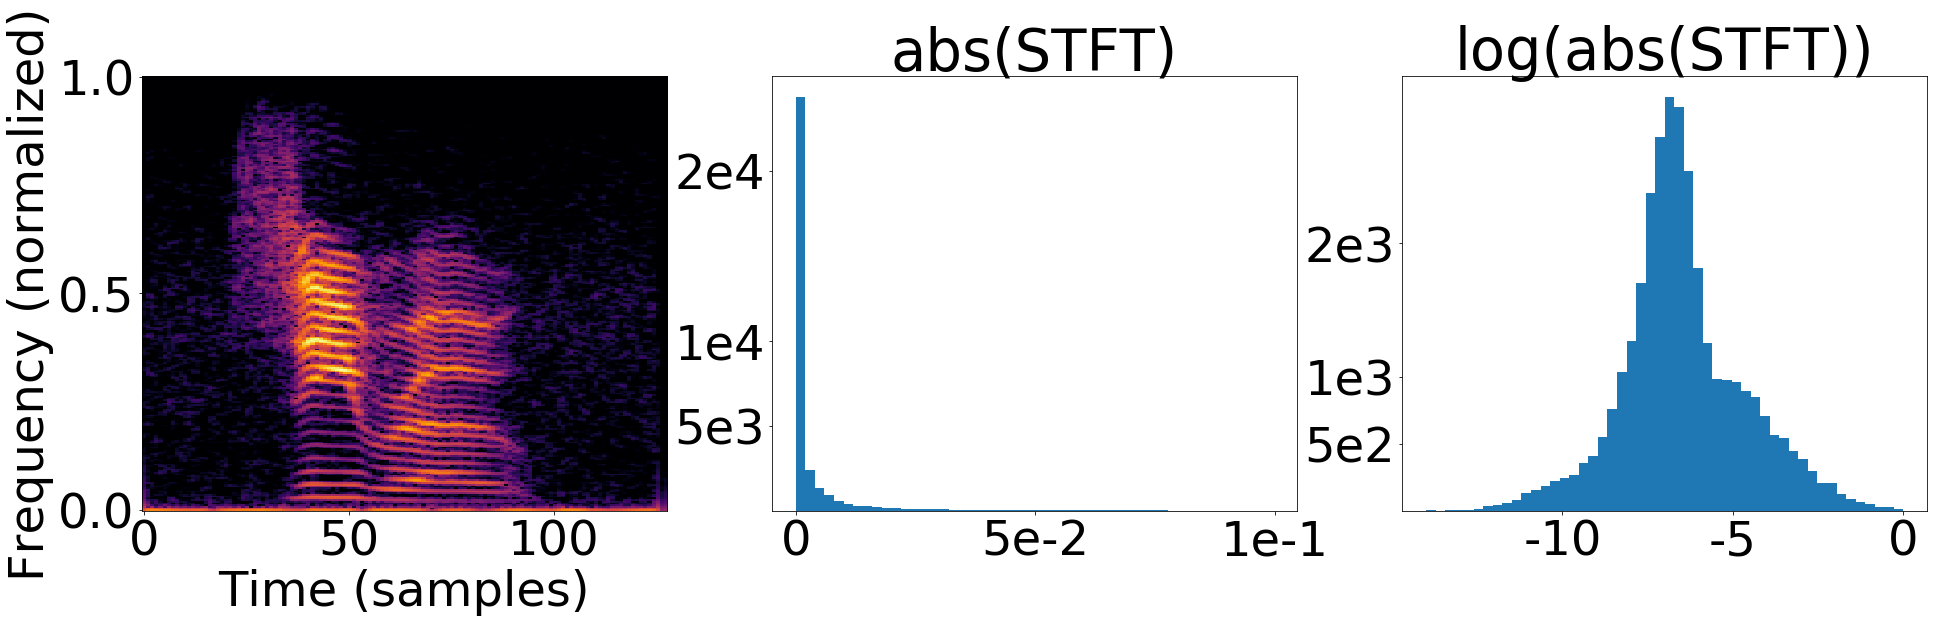

In [6]:
import pylab
plt.rcParams.update({'font.size': 48})
pylab.rcParams['figure.figsize'] = (32, 8)
matplotlib.rcParams['image.cmap'] =  'inferno'

plt.subplot(1,3,1)
ltfatpy.plotdgtreal(realDGT,1,2000,dynrange=60, colorbar=False);

plt.subplot(1,3,2)
plt.title('abs(STFT)')
plt.hist(np.abs(realDGT[np.abs(realDGT)<0.1]).flatten(), 50);
# ax = plt.gca()
plt.yticks([5e3,1e4,2e4], ['5e3', '1e4', '2e4']);
plt.xticks([0,5e-2,1e-1], ['0', '5e-2', '1e-1']);

# ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
# ax.set_xscale("log", nonposx='clip')

plt.subplot(1,3,3)
plt.title('log(abs(STFT))')
plt.yticks([5e2,1e3,2e3], ['5e2', '1e3', '2e3']);
plt.xticks([-10,-5,0], ['-10', '-5', '0']);

plt.hist(spectrogram.flatten(), 50);


plt.savefig('distributions.pdf',bbox_inches='tight', pad_inches=0.1)